# Signal and Image Processing Practical

https://users.fmrib.ox.ac.uk/~saad/ONBI/ONBI-Fourier_Practical_python.html

In MRI, the measurement of an object does not consist in integrals along lines. Instead, we directly measure the Fourier transform of the object. Typically, we measure the 2D Fourier transform of a slice through the object (e.g. in a technique called Echo Planar Imaging).

The Fourier space in MRI is called k-space. You can imagine k-space to be an image, where each pixel is a k-space sample, consisting of a complex number (magnitude and phase). Image reconstruction is then simply implemented with an inverse FFT (but with many twists depending on how sophisticated the measurement is).

Because of time limitations in typical experiments, we can only measure a smallish number of k-space pixels. This has consequences in terms of the quality of the reconstructed image, and many artefacts in MRI come from what happens when we measure k-space.

There are a number of MRI artefacts. In the remainder of this practical, we are going to simulate 3 types of artefacts that are frequent in MRI: Gibb's ringing, ghosting, and T2* blurring. 

# Практикум по обработке сигналов и изображений

В МРТ измерение объекта не заключается в интегралах вдоль линий. Вместо этого мы напрямую измеряем преобразование Фурье объекта. Обычно мы измеряем двумерное преобразование Фурье среза через объект (например, в технике, называемой Echo Planar Imaging).

Пространство Фурье в МРТ называется k-пространством. Вы можете представить себе k-пространство как изображение, где каждый пиксель является образцом k-пространства, состоящим из комплексного числа (величины и фазы). Затем реконструкция изображения просто реализуется с помощью обратного БПФ (но со многими изменениями в зависимости от сложности измерения).

Из-за ограничений по времени в типичных экспериментах мы можем измерить только небольшое количество пикселей k-пространства. Это имеет последствия с точки зрения качества реконструированного изображения, и многие артефакты в МРТ возникают из-за того, что происходит, когда мы измеряем k-пространство.

Существует ряд артефактов МРТ. В оставшейся части этого практического занятия мы смоделируем 3 типа артефактов, которые часто встречаются в МРТ: звон Гиббса, двоение изображения и размытие T2*.

In [1]:
import numpy as np
import matplotlib.pylab as plt

import skimage

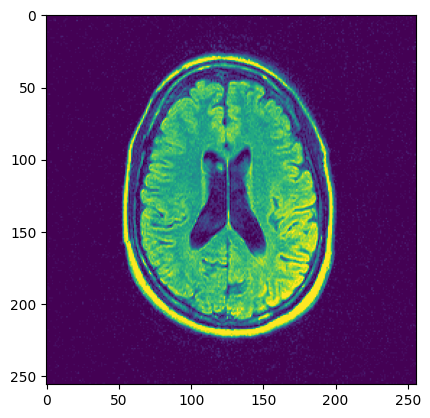

In [5]:
im = skimage.io.imread('brain.bmp', as_gray=True)     # If as_gray = True, it will convert the image to grayscale

plt.imshow(im)
plt.show()

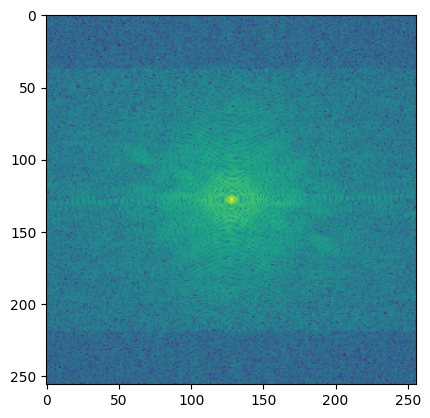

In [3]:
dt = np.fft.fft2(im)
data = np.fft.fftshift(dt)

plt.imshow(np.log(np.absolute(data)))   # we typically look at the magnitude
plt.show()

Обратное Фурье-преобразование:

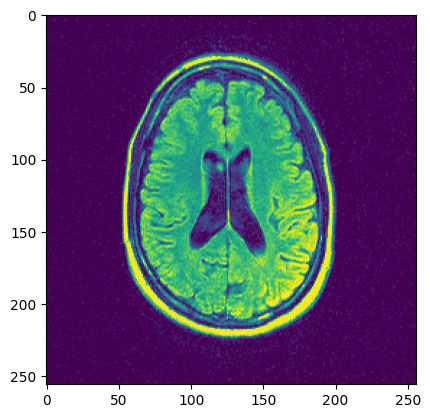

In [4]:
bf = np.fft.ifft2(data) # ,s=[256,256]
plt.imshow(np.abs(bf))    # we typically look at the magnitude
plt.show()

### Gibb's ringing

Gibb's ringing occurs when the frequencies that are sampled in k-space are not sufficiently high (remember: high frequencies are at the edges of k-space, low frequencies at the centre). We simulate this by "cutting" k-space along one of the two axes, as if we didn't have enough time to acquire these data. To exagerate the ringing, we will cut quite a lot of the high frequencies: 

### Звон Гиббса

Звон Гиббса возникает, когда частоты, которые сэмплируются в k-пространстве, недостаточно высоки (помните: высокие частоты находятся на краях k-пространства, низкие частоты в центре). 

Звон Гиббса проявляется сериями линий параллельных краю с резкой интенсивностью на изображении. Звон вызывается недостаточной оцифровкой эхо. Это означает, что в конце окна сбора сигнал не спал до нуля, и эхо не было полностью оцифровано

Мы имитируем это, «разрезая» k-пространство вдоль одной из двух осей, как будто у нас недостаточно времени для получения этих данных. Чтобы усилить звон, мы обрежем довольно много высоких частот:

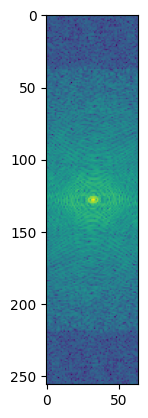

In [5]:
f_c = 32 # cut-off frequency

f_0 = data.shape[0]//2

K = data[:, f_0 - f_c : f_0 + f_c]   # this turns k-space from 256x256 to 256x256±f_c

plt.imshow(np.log(np.absolute(K)) )   # we typically look at the magnitude
plt.show()

And now reconstruct the object as a full 256x2


А теперь реконструируйте объект как полный 256x2

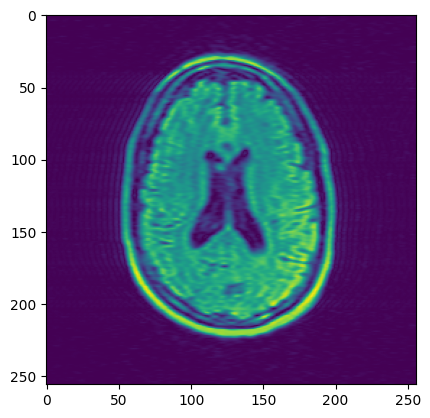

In [6]:
b = data.shape[0]
x = np.fft.ifft2(K,s=[b,b])
plt.imshow(np.abs(x))    # we typically look at the magnitude
plt.show()

You should be able to see the ringing artefacts along the horizontal axis but not the vertical axis.

Вы должны видеть артефакты звона вдоль горизонтальной оси, но не вдоль вертикальной оси.

https://www.elibrary.ru/item.asp?id=74527222 

Масштабная инвариантность свойств сетей Колмогорова-Арнольда для подавления звона Гиббса в МРТ

### Ghosting

Ghosting happens when even and odd k-space lines are intensity modulated differently. We are going to simulate this by taking every other line in k-space and scaling them by 80 percent:

### Призрачные изображения

Призрачные изображения возникают, когда четные и нечетные линии k-пространства модулируются по-разному. Мы собираемся смоделировать это, взяв каждую вторую линию в k-пространстве и масштабируя их на 80 процентов:

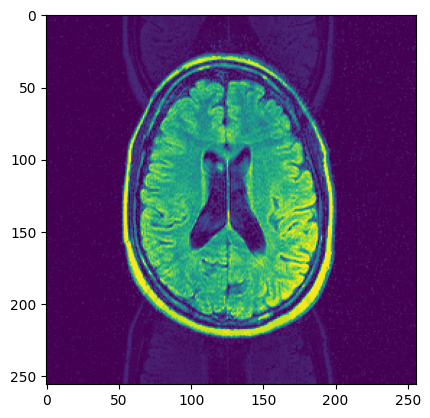

In [7]:
K = data.copy()
K[::2,:] = 0.8*K[::2,:]
x = np.fft.ifft2(K)
plt.imshow(np.abs(x))
plt.show()

You can see that the image gets "duplicated" and overlaps with itself along the dimension where we did the intensity modulation. Try along the other dimension now:


Вы можете видеть, что изображение "дублируется" и накладывается само на себя вдоль измерения, где мы сделали модуляцию интенсивности. Попробуйте теперь вдоль другого измерения:

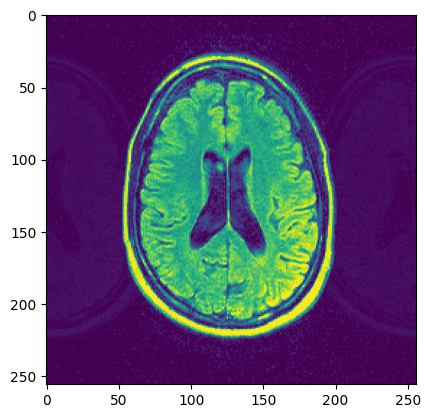

In [8]:
K = data.copy()
K[:,::2] = 0.9*K[:,::2]
x = np.fft.ifft2(K)
plt.imshow(np.abs(x))
plt.show()

Why does this happen? One way to understand this is to notice that modulating every other slice of the k-space data is like taking the original k-space data (unmodulated), and adding to it k-space data that is sampled at 2 pixel intervals (or rather adding -0.2 times that). Now remember that sampling in one space is the same as repeating in the other space. Sampling with a period of 2 pixels is the same as repeating with a period of N/2 pixels in the other space. So therefore, the reconstructed image is like the original images, plus a "ghost" image that is repeated with cycles of N/2 pixels.

Почему это происходит? Один из способов понять это — заметить, что модуляция каждого второго среза данных k-пространства похожа на то, что берутся исходные данные k-пространства (немодулированные) и добавляются к ним данные k-пространства, которые выбираются с интервалом в 2 пикселя (или, скорее, добавляются в -0,2 раза больше). Теперь помните, что выборка в одном пространстве — это то же самое, что и повторение в другом пространстве. Выборка с периодом в 2 пикселя — это то же самое, что и повторение с периодом N/2 пикселей в другом пространстве. Таким образом, восстановленное изображение похоже на исходные изображения, плюс «призрачное» изображение, которое повторяется с циклами N/2 пикселей.

Additionally:

Nyquist N/2 Ghosts

https://mriquestions.com/nyquist-n2-ghosts.html

The artifact you are describing is called the Nyquist N/2 Ghost. It occurs with echo-planar imaging sequences that have a zig-zag trajectory through k-space. In head MRI it is sometimes referred to as the "Three Brains Artifact". 


EPI pulse sequences are composed of a train of echoes, one echo generated for each line of k-space traversed. In zig-zag acquisition, every second echo is acquired in an alternate direction. For image reconstruction, even numbered echoes must be time-reversed so that match the odd numbered echoes before Fourier transformation.  

### T2* blurring

The final MRI artefact that we will look at is T2* blurring. This particular artefact is due to the fact that when we acquire k-space data, the signal that we base our measurement on decays over time, with a time constant called T2*.

Typically, we acquire k-space, say, from the bottom to the top, so we will simulate an intensity drop along that direction:

### T2* размытие

Последний артефакт МРТ, который мы рассмотрим, — это размытие T2*. Этот конкретный артефакт возникает из-за того, что когда мы получаем данные k-пространства, сигнал, на котором мы основываем наши измерения, со временем затухает, с постоянной времени, называемой T2*.

Обычно мы получаем k-пространство, скажем, снизу вверх, поэтому мы будем моделировать падение интенсивности вдоль этого направления:

In [9]:
T2star = 30            # milliseconds
Ttotal = 100           # time it takes to "read" k-space
N = data.shape[0] # number of pixels

K = data.copy()
for i in range(K.shape[1]):
    K[:,i] = K[:,i]*np.exp(-np.linspace(0,Ttotal,N)/T2star)

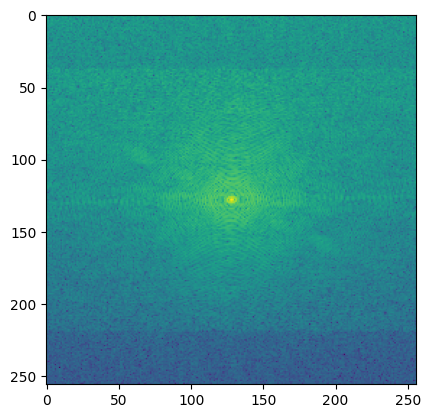

In [10]:
plt.imshow(np.log(np.absolute(K)))   # we typically look at the magnitude
plt.show()

Now let's reconstruct the object and see what happened:

Теперь давайте реконструируем объект и посмотрим, что произошло:

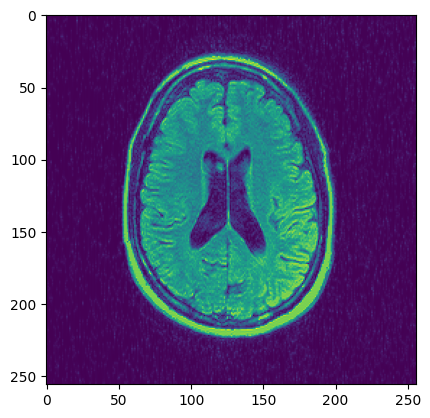

In [11]:
x = np.fft.ifft2(K)
plt.imshow(np.abs(x))
plt.show()

You should be able to see some blurring along the vertical axis. The shorter the value of T2* is, the more blurring there is (try this!).

Why does this happen? The easiest way to understand this is to consider that multiplying the k-space trajectory by an exponential decay is the same as doing a convolution of the image space with the Fourier transform of the exponential (which is called a Lorentzian function). This convolution operation effectively blurs the image.


Вы должны увидеть некоторую размытость вдоль вертикальной оси. Чем короче значение T2*, тем больше размытость (попробуйте это!).

Почему это происходит? Самый простой способ понять это — умножить траекторию k-пространства на экспоненциальный распад — это то же самое, что выполнить свертку пространства изображения с преобразованием Фурье экспоненты (которое называется функцией Лоренца). Эта операция свертки эффективно размывает изображение.

https://ru.wikipedia.org/wiki/%D0%90%D1%80%D1%82%D0%B5%D1%84%D0%B0%D0%BA%D1%82%D1%8B_%D0%9C%D0%A0%D0%A2

## Problem

Try do the same with DICOM data:

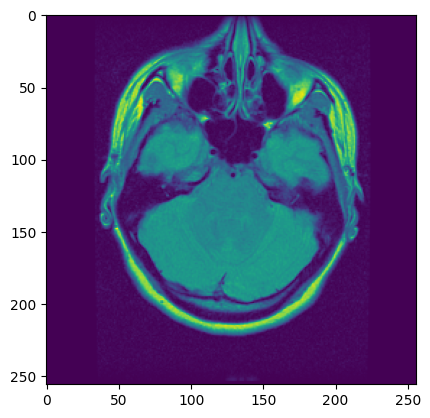

In [15]:
# or DICOM:
import matplotlib.pylab as plt
import pydicom as dicom

# specify your image path
image_path = 'brain_007.dcm' # from https://github.com/rii-mango/Papaya/tree/master/tests/data/dicom
ds = dicom.dcmread(image_path)
plt.imshow(ds.pixel_array)    # we typically look at the magnitude
plt.show()